In [ ]:
!pip install Bio

In [ ]:
from Bio import Entrez

# Provide your email address for accessing PubMed API
Entrez.email = "Your.Email@gmail.com"

q_topics = ['diabetes', 'cancer', 'pneumonia', 'prostate', 'liver cirrhosis',
            'dementia', 'sclerosis']
articles = []

for t in q_topics:
  # Query to search PubMed
  query = f"{t}[MeSH Terms] AND review[Publication Type]"

  handle = Entrez.esearch(db="pubmed", term=query, retmax=100)
  record = Entrez.read(handle)
  print(f'processing {t}')
  for id in record["IdList"]:
      article = Entrez.efetch(db="pubmed", id=id, rettype="medline", retmode="text")
      articles.append(article.read())

# Close the handle
handle.close()

print(articles[0])
print(len(articles))

processing diabetes
processing cancer
processing pneumonia
processing prostate
processing liver cirrhosis
processing dementia
processing sclerosis

PMID- 38814845
OWN - NLM
STAT- MEDLINE
DCOM- 20240530
LR  - 20240530
IS  - 1462-4753 (Print)
IS  - 1462-4753 (Linking)
VI  - 29
IP  - Sup6
DP  - 2024 Jun 1
TI  - An overview of diabetes-related foot ulcers.
PG  - S30-S36
LID - 10.12968/bjcn.2024.29.Sup6.S30 [doi]
AB  - The escalating prevalence of diabetes mellitus presents concern due to its 
      widespread organ damage, including the heart, kidneys, eyes, and nerves, leading 
      to severe complications such as heart attacks, strokes, blindness, and 
      diabetes-related foot ulcers (DFUs). Management in the community setting should 
      be focused on prevention, assessment and patient-centred care. By understanding 
      the complex aetiology, risk factors, and classification of DFUs, along with 
      utilising evidence-based interventions like the Wound, Infection and Ischemia

In [ ]:
for article in articles[:5]:
  print(article)


PMID- 38814845
OWN - NLM
STAT- MEDLINE
DCOM- 20240530
LR  - 20240530
IS  - 1462-4753 (Print)
IS  - 1462-4753 (Linking)
VI  - 29
IP  - Sup6
DP  - 2024 Jun 1
TI  - An overview of diabetes-related foot ulcers.
PG  - S30-S36
LID - 10.12968/bjcn.2024.29.Sup6.S30 [doi]
AB  - The escalating prevalence of diabetes mellitus presents concern due to its 
      widespread organ damage, including the heart, kidneys, eyes, and nerves, leading 
      to severe complications such as heart attacks, strokes, blindness, and 
      diabetes-related foot ulcers (DFUs). Management in the community setting should 
      be focused on prevention, assessment and patient-centred care. By understanding 
      the complex aetiology, risk factors, and classification of DFUs, along with 
      utilising evidence-based interventions like the Wound, Infection and Ischemia 
      (WIfI) system, we can streamline care. Neuropathy, peripheral arterial disease 
      and infection are major contributors to DFU developme

In [ ]:
import re

abbreviations = ['CI', 'AD', 'IRAD', 'AID', 'AU', 'AUID', 'FAU', 'BTI', 'CTI',
                 'COIS', 'CN', 'CRDT', 'DCOM', 'DA', 'LR', 'DEP', 'DP', 'EN',
                 'ED', 'FED', 'EDAT', 'FPS', 'GS', 'GN', 'GR', 'IR', 'FIR',
                 'ISBN', 'IS', 'IP', 'TA', 'JT', 'LA', 'LID', 'MID', 'MHDA',
                 'MH', 'JID', 'RF', 'OAB', 'OCI', 'OID', 'OT', 'OTO', 'OWN',
                 'PG', 'PS', 'PL', 'PHST', 'PST', 'PT', 'PUBM', 'PMC', 'PMCR',
                 'PMID', 'RN', 'NM', 'SI', 'SO', 'SFM', 'STAT', 'SB', 'TI',
                 'TT', 'VI', 'VTI']

def extract_doi(text):
    # Define the regex pattern to match the line starting with "AID -"
    pattern = r'AID\s*-\s*(\S+)\s*\[doi\]'
    # Search for the pattern in the text
    match = re.search(pattern, text)
    if match:
        # Extract the DOI from the matched group
        doi = match.group(1)
        return doi
    else:
        return None


def extract_abstract(text):
    # Use regular expression to find the abstract text
    match = re.search(r'\nAB  - (.*?)(?=\n[A-Z]+ - |$)', text, re.DOTALL)
    if match:
        abstract_text = match.group(1).strip()
        # Check if any section indicator is present within the abstract text
        for section_indicator in abbreviations:
          if section_indicator + '  -' in abstract_text:
            abstract_text = abstract_text.split(section_indicator+'  -')[0].strip()
        return abstract_text
    return None

def extract_mh_with_asterisks(text):
    # Use regular expression to find the MH fields containing asterisks
    mh_fields = re.findall(r'\nMH  - \*[^*\n]+', text)
    modified_fields = []
    for field in mh_fields:
        # Split the field by asterisk and keep only the part after the asterisk
        field_parts = field.split("*")
        modified_field = " ".join(field_parts[1:])
        modified_field = modified_field.split("/", 1)[0]
        modified_fields.append(modified_field.strip())
    return modified_fields

processed_articles = []
for i, article in enumerate(articles):
    article_object = {}
    abstract = extract_abstract(article)
    article_object['abstract'] = ' '.join(abstract.split()).strip() if abstract else ''
    article_object['mesh_terms'] = extract_mh_with_asterisks(article)
    doi = extract_doi(article)
    article_object['url'] = 'https://doi.org/'+doi if doi else ''
    article_object['topic'] = q_topics[i//100]
    processed_articles.append(article_object)

print(len(processed_articles))
print(processed_articles[0])

700
{'abstract': 'The escalating prevalence of diabetes mellitus presents concern due to its widespread organ damage, including the heart, kidneys, eyes, and nerves, leading to severe complications such as heart attacks, strokes, blindness, and diabetes-related foot ulcers (DFUs). Management in the community setting should be focused on prevention, assessment and patient-centred care. By understanding the complex aetiology, risk factors, and classification of DFUs, along with utilising evidence-based interventions like the Wound, Infection and Ischemia (WIfI) system, we can streamline care. Neuropathy, peripheral arterial disease and infection are major contributors to DFU development, highlighting the importance of early detection and intervention. Comprehensive care addressing vascular health, infection control, pressure offloading, wound management, metabolic control, and patient education is essential for successful DFU management. Ultimately, proactive prevention strategies and in

In [ ]:
!pip install selenium

In [ ]:
!apt-get update
!apt-get install -y chromium-chromedriver

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
chromium-chromedriver is already the newest version (1:85.0.4183.83-0ubuntu2.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 50 n

In [ ]:
!pip install goose3

In [ ]:
from selenium import webdriver
from goose3 import Goose
import json


def get_article_text(page):
    # Initialize Goose object
    g = Goose()
    if page:
      article = g.extract(raw_html=page)
      # Return the article text
      return article.cleaned_text
    else: return ''


# Set ChromeDriver options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')  # Run Chrome in headless mode
chrome_options.add_argument('--no-sandbox')  # Required for running in Colab
chrome_options.add_argument('--disable-dev-shm-usage')  # Required for running in Colab

# Set ChromeDriver path
#chrome_driver_path = '/usr/bin/chromedriver'  # Path to ChromeDriver in Colab

# Initialize Chrome WebDriver
driver = webdriver.Chrome(options=chrome_options)

# Scraping
for i, art in enumerate(processed_articles):
  print(f'processed {i+1}/{len(processed_articles)}')
  url = art['url']
  if url != '':
    try:
      driver.get(url)
      page_content = driver.page_source
    except:
      print('Error in scraping webpage')
      page_content = None
    if page_content:
      full_text = get_article_text(page_content)
      if len(full_text) > 5000:
        art['full_text'] = full_text

# Close the browser
driver.quit()

# Print processed article under index 0
print(processed_articles[0])

processed 1/700
processed 2/700
processed 3/700
processed 4/700
processed 5/700
processed 6/700
processed 7/700
processed 8/700


processed 9/700
processed 10/700
processed 11/700
processed 12/700
processed 13/700
processed 14/700
processed 15/700
processed 16/700
processed 17/700
processed 18/700
processed 19/700
processed 20/700
processed 21/700
processed 22/700
processed 23/700
processed 24/700
processed 25/700
processed 26/700
processed 27/700
processed 28/700
processed 29/700
processed 30/700
processed 31/700
processed 32/700
processed 33/700
processed 34/700
processed 35/700
processed 36/700
processed 37/700
processed 38/700
processed 39/700
processed 40/700
processed 41/700
processed 42/700
processed 43/700
processed 44/700
processed 45/700
processed 46/700
processed 47/700
processed 48/700
processed 49/700
processed 50/700
processed 51/700
processed 52/700
processed 53/700
processed 54/700
processed 55/700
processed 56/700
processed 57/700
processed 58/700
processed 59/700
processed 60/700
processed 61/700
processed 62/700
processed 63/700
processed 64/700
processed 65/700
processed 66/700
processed 67/70

processed 101/700
processed 102/700
processed 103/700
processed 104/700
processed 105/700
processed 106/700
processed 107/700
processed 108/700
processed 109/700
processed 110/700
processed 111/700
processed 112/700
processed 113/700
processed 114/700
processed 115/700
processed 116/700
processed 117/700
processed 118/700
processed 119/700
processed 120/700
processed 121/700
processed 122/700
processed 123/700
processed 124/700
processed 125/700
processed 126/700
processed 127/700
processed 128/700
processed 129/700
processed 130/700
processed 131/700
processed 132/700
processed 133/700
processed 134/700
processed 135/700
processed 136/700
processed 137/700
processed 138/700
processed 139/700
processed 140/700
processed 141/700
processed 142/700
processed 143/700
processed 144/700
processed 145/700
processed 146/700
processed 147/700
processed 148/700
processed 149/700
processed 150/700
processed 151/700
processed 152/700
processed 153/700
processed 154/700
processed 155/700
processed 

                                          May 27, 2024 could not be resolved to UTC


processed 176/700


                                          May 27, 2024 could not be resolved to UTC


processed 177/700


                                          May 27, 2024 could not be resolved to UTC


processed 178/700
processed 179/700
processed 180/700
processed 181/700
processed 182/700
processed 183/700
processed 184/700
processed 185/700
processed 186/700
processed 187/700
processed 188/700
processed 189/700
processed 190/700
processed 191/700
processed 192/700
processed 193/700
processed 194/700
processed 195/700
processed 196/700
processed 197/700
processed 198/700
processed 199/700
processed 200/700
processed 201/700
processed 202/700
processed 203/700
processed 204/700
processed 205/700
processed 206/700
processed 207/700
processed 208/700
processed 209/700
processed 210/700
processed 211/700
processed 212/700
processed 213/700
processed 214/700
processed 215/700
processed 216/700
processed 217/700
processed 218/700
processed 219/700
processed 220/700
processed 221/700
processed 222/700
processed 223/700
processed 224/700
processed 225/700
processed 226/700
processed 227/700
processed 228/700
processed 229/700
processed 230/700
processed 231/700
processed 232/700
processed 

#Текстовий файл із результатами необхідно зберегти під час активного середовища виконання

In [ ]:
with open('articles.json', 'w', encoding='utf-8') as f:
  json.dump(processed_articles, f, ensure_ascii=False, indent=2)

In [ ]:
with open("articles.json", "r") as f:
    data = json.load(f)
print(data[0])

{'abstract': 'The escalating prevalence of diabetes mellitus presents concern due to its widespread organ damage, including the heart, kidneys, eyes, and nerves, leading to severe complications such as heart attacks, strokes, blindness, and diabetes-related foot ulcers (DFUs). Management in the community setting should be focused on prevention, assessment and patient-centred care. By understanding the complex aetiology, risk factors, and classification of DFUs, along with utilising evidence-based interventions like the Wound, Infection and Ischemia (WIfI) system, we can streamline care. Neuropathy, peripheral arterial disease and infection are major contributors to DFU development, highlighting the importance of early detection and intervention. Comprehensive care addressing vascular health, infection control, pressure offloading, wound management, metabolic control, and patient education is essential for successful DFU management. Ultimately, proactive prevention strategies and interd

In [ ]:
!pip install wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


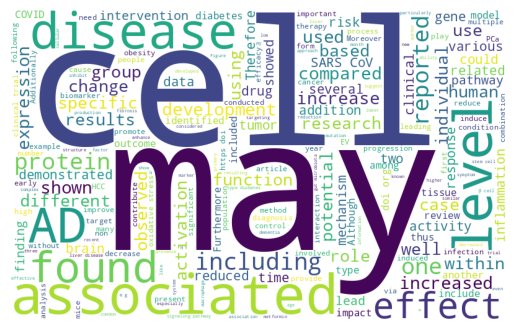

In [ ]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
added_stopwords = ['patient', 'study', 'studies', 'treatment', 'result',
                   'associate', 'also', 'however', 'due', 'patients',
                   'associates', 'et', 'al']
stop_words.extend(added_stopwords)

wc = WordCloud(background_color='white', stopwords=stop_words, width = 800,
               height = 500).generate(' '.join([entry['full_text'] for entry in data if 'full_text' in entry.keys()]))
plt.axis("off")
plt.imshow(wc)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

texts = [entry['abstract'] for entry in data]
labels = [entry['topic'] for entry in data]

texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Create and train the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(texts_train, labels_train)

# Predict the labels for the test set
predictions = model.predict(texts_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(labels_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Test the model
new_text = ["Patient is showing signs of bad memory"]
new_prediction = model.predict(new_text)
print(new_prediction)

Accuracy: 77.14%
['sclerosis']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare texts
texts = [entry['abstract'] for entry in data]

# Convert the texts to a document-term matrix
vectorizer = CountVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(texts)

# Apply LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(dtm)

# Display the topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, 2)

Topic 1:
review treatment
Topic 2:
disease patients
Topic 3:
prostate cancer
Topic 4:
review case
Topic 5:
ad disease
Topic 6:
cancer care
Topic 7:
liver cells
Topic 8:
studies 95
Topic 9:
liver patients
Topic 10:
treatment disease


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78a01fb267a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-23e5df77.3.21.dev.so: cannot open shared object file: No such file or directory


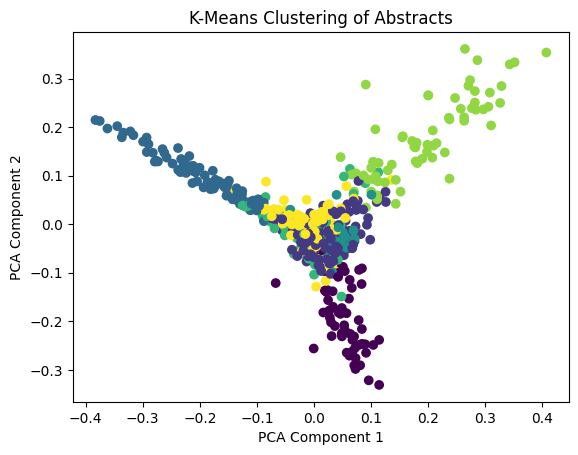

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Prepare texts
texts = [entry['abstract'] for entry in data]

# Convert the texts to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)

# Reduce dimensionality for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering of Abstracts')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Prepare texts
texts = [entry['full_text'] for entry in data if 'full_text' in entry.keys()]

# Tokenize the texts
tokenized_texts = [word_tokenize(text.lower()) for text in texts]

# Train a Word2Vec model
model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Find similar words
similar_words = model.wv.most_similar('cancer', topn=3)
print(similar_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('breast', 0.8055816292762756), ('lung', 0.741066575050354), ('prostate', 0.7299237847328186)]


In [ ]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.1/990.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 38.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-man

In [ ]:
import stanza

stanza.download('en', package='mimic', processors={'ner':'i2b2'})

nlp = stanza.Pipeline('en', package='mimic', processors={'ner':'i2b2'})
doc = nlp(data[0]['abstract'])
print(doc.entities)

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading these customized packages for language: en (English)...
| Processor       | Package        |
------------------------------------
| tokenize        | mimic          |
| pos             | mimic_charlm   |
| lemma           | mimic_nocharlm |
| depparse        | mimic_charlm   |
| ner             | i2b2           |
| forward_charlm  | mimic          |
| pretrain        | mimic          |
| backward_charlm | mimic          |



INFO:stanza:Downloaded file to /root/stanza_resources/en/tokenize/mimic.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/pos/mimic_charlm.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/lemma/mimic_nocharlm.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/depparse/mimic_charlm.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/ner/i2b2.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/forward_charlm/mimic.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/pretrain/mimic.pt


INFO:stanza:Downloaded file to /root/stanza_resources/en/backward_charlm/mimic.pt
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor | Package        |
------------------------------
| tokenize  | mimic          |
| pos       | mimic_charlm   |
| lemma     | mimic_nocharlm |
| depparse  | mimic_charlm   |
| ner       | i2b2           |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


[{
  "text": "diabetes mellitus",
  "type": "PROBLEM",
  "start_char": 29,
  "end_char": 46
}, {
  "text": "its widespread organ damage",
  "type": "PROBLEM",
  "start_char": 71,
  "end_char": 98
}, {
  "text": "the heart, kidneys, eyes, and nerves",
  "type": "PROBLEM",
  "start_char": 110,
  "end_char": 146
}, {
  "text": "severe complications",
  "type": "PROBLEM",
  "start_char": 159,
  "end_char": 179
}, {
  "text": "heart attacks",
  "type": "PROBLEM",
  "start_char": 188,
  "end_char": 201
}, {
  "text": "strokes",
  "type": "PROBLEM",
  "start_char": 203,
  "end_char": 210
}, {
  "text": "blindness",
  "type": "PROBLEM",
  "start_char": 212,
  "end_char": 221
}, {
  "text": "diabetes",
  "type": "PROBLEM",
  "start_char": 227,
  "end_char": 235
}, {
  "text": "foot ulcers (DFUs",
  "type": "PROBLEM",
  "start_char": 244,
  "end_char": 261
}, {
  "text": "Management",
  "type": "TREATMENT",
  "start_char": 264,
  "end_char": 274
}, {
  "text": "assessment",
  "type": "TEST",
  "

In [ ]:
all_terms = []
for entry in data:
  for term in entry['mesh_terms']:
    if term not in all_terms:
      all_terms.append(term)

In [ ]:
len(all_terms)

750

In [ ]:
all_entities = []
for t in all_terms:
  ents = nlp(t).entities
  if ents:
    all_entities.extend(ents)
print(len(all_entities))
print(all_entities)

605
[{
  "text": "Diabetic Foot",
  "type": "PROBLEM",
  "start_char": 0,
  "end_char": 13
}, {
  "text": "Diabetes Mellitus",
  "type": "PROBLEM",
  "start_char": 0,
  "end_char": 17
}, {
  "text": "Type 2",
  "type": "PROBLEM",
  "start_char": 19,
  "end_char": 25
}, {
  "text": "Obesity",
  "type": "PROBLEM",
  "start_char": 0,
  "end_char": 7
}, {
  "text": "Glucagon-Like Peptide-1 Receptor",
  "type": "TREATMENT",
  "start_char": 0,
  "end_char": 32
}, {
  "text": "Weight Loss",
  "type": "PROBLEM",
  "start_char": 0,
  "end_char": 11
}, {
  "text": "Fatty Liver",
  "type": "PROBLEM",
  "start_char": 0,
  "end_char": 11
}, {
  "text": "Diabetic Neuropathies",
  "type": "PROBLEM",
  "start_char": 0,
  "end_char": 21
}, {
  "text": "Blood Glucose",
  "type": "TEST",
  "start_char": 0,
  "end_char": 13
}, {
  "text": "Diabetes Mellitus",
  "type": "PROBLEM",
  "start_char": 0,
  "end_char": 17
}, {
  "text": "Nitric Oxide Synthase",
  "type": "TREATMENT",
  "start_char": 0,
  "end_ch

In [ ]:
!pip install scispacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 8.9 MB/s eta 0:00:00
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
  Created wheel for nmslib: filename=nmslib-2.1.1-cp310-cp310-linux_x86_64.whl size=13578641 sha256=6cdd73014339806757f5a9c061749545479652645867365237a2e69dfb461cf9
  Stored in directory: /root/.cache/pip/wheels/21/1a/5d/4cc754a5b1a88405cad184b76f823897a63a8d19afcd4b9314
Successfully built nmslib
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4


In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_md-0.5.4.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.1/119.1 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en-core-sci-md: filename=en_core_sci_md-0.5.4-py3-none-any.whl size=119157928 sha256=07eea5f13011a42089b57c9d3a5af23054f6f471e7e8ba7a0dfc8d845bac402c
  Stored in directory: /root/.cache/pip/wheels/d5/01/f2/a4cc15346ad4d61907a67320d06bdfb9d5bf1b8e99004e9cd4
Successfully built en-core-sci-md


In [ ]:
import scispacy
import spacy

nlp = spacy.load("en_core_sci_md")

In [ ]:
text = data[0]['abstract']
doc = nlp(text)

print(doc.ents)

(escalating prevalence, diabetes mellitus, widespread, organ damage, heart, kidneys, eyes, nerves, severe, complications, heart attacks, strokes, blindness, diabetes-related foot ulcers, DFUs, Management, community setting, prevention, assessment, patient-centred care, complex, aetiology, risk factors, classification, DFUs, evidence-based interventions, Wound, Infection, Ischemia, streamline care, Neuropathy, peripheral arterial disease, infection, DFU, development, early detection, intervention, Comprehensive care, vascular health, infection control, pressure offloading, wound management, metabolic control, patient education, DFU, management, proactive prevention, interdisciplinary collaboration, management, DFUs, improving, patient outcomes)


#Необхідно підтвердити перезапуск середовища під час інсталяції наступних бібліотек

In [ ]:
!pip install nlu johnsnowlabs

In [ ]:
import nlu
model = nlu.load('biobert')
model.predict('Patient is suffering from dementia and loss of apetite')

biobert_pubmed_base_cased download started this may take some time.
Approximate size to download 386.4 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,token,word_embedding_biobert
0,Patient,"[-0.10050546377897263, 0.1352568417787552, 0.3..."
0,is,"[-0.3339977264404297, -0.043342284858226776, 0..."
0,suffering,"[-0.4778764545917511, -0.02956039272248745, 0...."
0,from,"[-0.34602388739585876, 0.1581842452287674, 0.3..."
0,dementia,"[-0.2814425826072693, 0.4432307481765747, -0.0..."
0,and,"[-0.19914981722831726, -0.21929778158664703, -..."
0,loss,"[-0.3243619203567505, 0.32407358288764954, -0...."
0,of,"[-0.17388111352920532, 0.17577742040157318, -0..."
0,apetite,"[-0.5081720948219299, 0.14521150290966034, -0...."


In [ ]:
model.predict('Пацієнт скаржиться на часті мігрені.')

,token,word_embedding_biobert
0,Пацієнт,"[-0.4400445520877838, 0.08779347687959671, -0...."
0,скаржиться,"[0.282826691865921, -0.1863892376422882, 0.070..."
0,на,"[-0.6701173186302185, -0.5081194639205933, -0...."
0,часті,"[-0.4017447233200073, -0.5787779092788696, -0...."
0,мігрені,"[-0.44108906388282776, -0.5061469674110413, -0..."
0,.,"[-0.3923877477645874, -0.7567803263664246, -0...."
